# **데이터 불러오기**

### DATASET과 DATALOADER

 데이터 샘플을 처리하는 코드는 지저분(messy)하고 유지보수가 어려울 수 있습니다; 더 나은 가독성(readability)과 모듈성(modularity)을 위해 데이터셋 코드를 모델 학습 코드로부터 분리하는 것이 이상적입니다. PyTorch는 torch.utils.data.DataLoader 와 torch.utils.data.Dataset 의 두 가지 데이터 기본 요소를 제공하여 미리 준비해둔(pre-loaded) 데이터셋 뿐만 아니라 가지고 있는 데이터를 사용할 수 있도록 합니다. Dataset 은 샘플과 정답(label)을 저장하고, DataLoader 는 Dataset 을 샘플에 쉽게 접근할 수 있도록 순회 가능한 객체(iterable)로 감쌉니다.

 PyTorch의 도메인 특화 라이브러리들은 (FashionMNIST와 같은) 미리 준비해둔(pre-loaded) 다양한 데이터셋을 제공합니다. 데이터셋은 torch.utils.data.Dataset 의 하위 클래스로 개별 데이터를 특정하는 함수가 구현되어 있습니다. 이러한 데이터셋은 모델을 만들어보고(prototype) 성능을 측정(benchmark)하는데 사용할 수 있습니다. 여기에서 데이터셋들을 찾아볼 수 있습니다: 이미지 데이터셋, 텍스트 데이터셋 및 오디오 데이터셋

### 데이터셋 불러오기
TorchVision 에서 Fashion-MNIST 데이터셋을 불러오는 예제를 살펴보겠습니다. Fashion-MNIST는 Zalando의 기사 이미지 데이터셋으로 60,000개의 학습 예제와 10,000개의 테스트 예제로 이루어져 있습니다. 각 예제는 흑백(grayscale)의 28x28 이미지와 10개 분류(class) 중 하나인 정답(label)으로 구성됩니다.

다음 매개변수들을 사용하여 FashionMNIST 데이터셋 을 불러옵니다:
root 는 학습/테스트 데이터가 저장되는 경로입니다.

train 은 학습용 또는 테스트용 데이터셋 여부를 지정합니다.

download=True 는 root 에 데이터가 없는 경우 인터넷에서 다운로드합니다.

transform 과 target_transform 은 특징(feature)과 정답(label) 변형(transform)을 지정합니다.

In [1]:
import torch 
from torch.utils.data import Dataset
from torchvision import datasets 
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [7]:
training_data  = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor()
)


test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

In [12]:
print(training_data)
print('--' * 20)
print(test_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
----------------------------------------
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


### 데이터셋을 순회하고 시각화하기
 
 Dataset 에 리스트(list)처럼 직접 접근(index)할 수 있습니다: training_data[index]. matplotlib 을 사용하여 학습 데이터의 일부를 시각화해보겠습니다.

In [38]:
print('training data 의 길이 : ',len(training_data))
print('training data 의 원소 : ',type(training_data[0])) # tuple 형태로 감싸져있음 각 원소는
print('training data 의 원소의 길이 : ',len(training_data[0])) 
print('training data 의 원소의 첫번 째 구성  : ',(type(training_data[0][0]))) # 첫 번째 원소는 첫 번째 이미지의 텐서 형태
print('training data 의 원소의 두번 째 구성  : ',(type(training_data[0][1])))  # 두 번째 원소는 첫 번째 이미지의 label

training data 의 길이 :  60000
training data 의 원소 :  <class 'tuple'>
training data 의 원소의 길이 :  2
training data 의 원소의 첫번 째 구성  :  <class 'torch.Tensor'>
training data 의 원소의 두번 째 구성  :  <class 'int'>


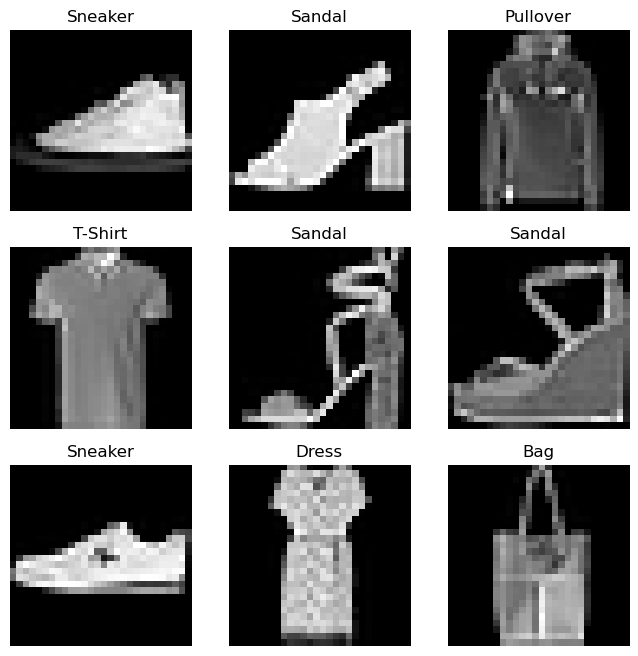

In [44]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

fig,ax = plt.subplots(figsize = (8,8), ncols = 3, nrows = 3)
ax = ax.flatten()

for i in range(3 * 3):
    
    sample_idx = torch.randint(len(training_data) , size = (1,)).item() # training data 의 길이안에서 랜덤한 원소를 스칼라 형태로 
    img,label = training_data[sample_idx] # img 에는 tensor, label 엔 label 값 저장 
    
    ax[i].set_title(labels_map[label])
    ax[i].imshow(img.squeeze(), cmap = 'gray')
    ax[i].axis('off')

### 파일에서 사용자 정의 데이터셋 만들기

사용자 정의 Dataset 클래스는 반드시 3개 함수를 구현해야 합니다: __init__, __len__, and __getitem__. 아래 구현을 살펴보면 FashionMNIST 이미지들은 img_dir 디렉토리에 저장되고, 정답은 annotations_file csv 파일에 별도로 저장됩니다.

다음 장에서 각 함수들에서 일어나는 일들을 자세히 살펴보겠습니다.

In [45]:
import os
import pandas as pd
from torchvision.io import read_image

In [46]:
class CustomImageDataset(Dataset):
    
    def __init__(self, annotations_file, img_dir , transform = None, target_transform = None):
        
        self.img_labels = pd.read_csv(annotations_file, names = ['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self,idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx,1]
        
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
            
        return image,label

### __init__

__init__ 함수는 Dataset 객체가 생성(instantiate)될 때 한 번만 실행됩니다. 여기서는 이미지와 주석 파일(annotation_file)이 포함된 디렉토리와 (다음 장에서 자세히 살펴볼) 두가지 변형(transform)을 초기화합니다.

labels.csv 파일은 다음과 같습니다:

### __len__

__len__ 함수는 데이터셋의 샘플 개수를 반환합니다.

### __getitem__

__getitem__ 함수는 주어진 인덱스 idx 에 해당하는 샘플을 데이터셋에서 불러오고 반환합니다. 인덱스를 기반으로, 디스크에서 이미지의 위치를 식별하고, read_image 를 사용하여 이미지를 텐서로 변환하고, self.img_labels 의 csv 데이터로부터 해당하는 정답(label)을 가져오고, (해당하는 경우) 변형(transform) 함수들을 호출한 뒤, 텐서 이미지와 라벨을 Python 사전(dict)형으로 반환합니다.

### DataLoader로 학습용 데이터 준비하기 

Dataset 은 데이터셋의 특징(feature)을 가져오고 하나의 샘플에 정답(label)을 지정하는 일을 한 번에 합니다. 모델을 학습할 때, 일반적으로 샘플들을 《미니배치(minibatch)》로 전달하고, 매 에폭(epoch)마다 데이터를 다시 섞어서 과적합(overfit)을 막고, Python의 multiprocessing 을 사용하여 데이터 검색 속도를 높이려고 합니다.

DataLoader 는 간단한 API로 이러한 복잡한 과정들을 추상화한 순회 가능한 객체(iterable)입니다.

In [64]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64 , shuffle = True)

### DataLoader를 통해 순회하기(iterate)

DataLoader 에 데이터셋을 불러온 뒤에는 필요에 따라 데이터셋을 순회(iterate)할 수 있습니다. 아래의 각 순회(iteration)는 (각각 batch_size=64 의 특징(feature)과 정답(label)을 포함하는) train_features 와 train_labels 의 묶음(batch)을 반환합니다. shuffle=True 로 지정했으므로, 모든 배치를 순회한 뒤 데이터가 섞입니다. (데이터 불러오기 순서를 보다 세밀하게(finer-grained) 제어하려면 Samplers 를 살펴보세요.)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


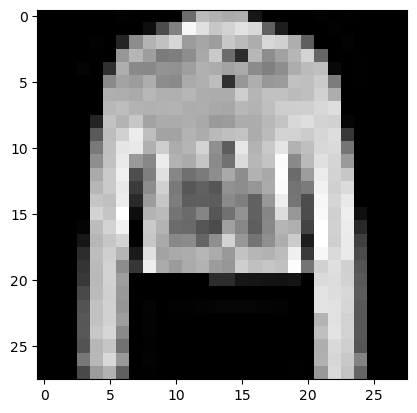

Label: 4


In [65]:
iter_train_dataloader = iter(train_dataloader) # 반복 순회가 가능한 iterator 형태로 변경

train_features , train_labels = next(iter_train_dataloader) # iterator 에서 어떤 한 이미지 텐서와 라벨 저장 

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [90]:
print('train_dataloader 의 길이는 ')
print(len(iter_train_dataloader)) # train_dataloader 에는 938 개의 iterator 형태 (tuple)로 저장되어 있음
print('\n')
print('train_dataloader 의 첫 번째 원소의 모습은')
print(train_features)
print('\n')
print('train_dataloader 의 첫 번째 원소의 형태는')
print(train_features.shape)

train_dataloader 의 길이는 
938


train_dataloader 의 첫 번째 원소의 모습은
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..

batch size 를 64로 했기 때문에 train_dataloader 에는 64개의 이미지들이 들어있는 쌍이 938개 존재한다.

이 때 train_dataloader 의 첫 번째 이미지 쌍을 train_features 에다가 지정했을 때 

train_features 에 들어있는 tensor 들은 채널이 1나이면서 넓이와 높이가 28 인 이미지들이 64개의 쌍으로 존재한다